In [1]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

import kalepy as kale

from kalepy.plot import nbshow

In [2]:
DPI = 256

def figax():
    fig, ax = plt.subplots(figsize=[5, 3], dpi=DPI)
    plt.subplots_adjust(left=0.1, bottom=0.2, right=0.97, top=0.98)
    return fig, ax

Saved to '/Users/lzkelley/Programs/kalepy/paper/reflect.png'


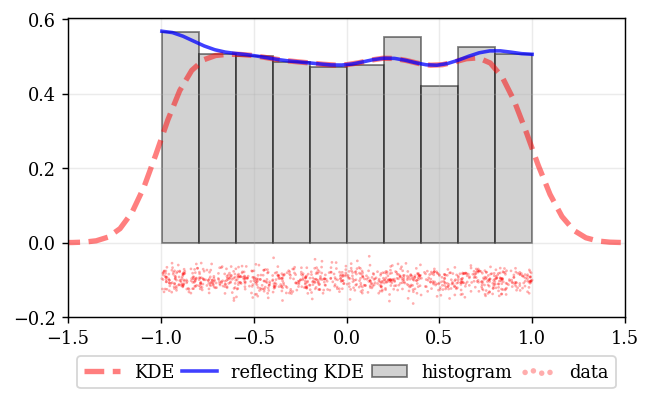

In [35]:
fig, ax = figax()

# Uniform data (edges at -1 and +1)
NDATA = 1e3
np.random.seed(54321)
data = np.random.uniform(-1.0, 1.0, int(NDATA))

# Plot the data
kale.plot.carpet(data, label='data')
# Histogram the data
plt.hist(data, density=True, alpha=0.5, label='histogram', color='0.65', edgecolor='k')

# Standard KDE will undershoot just-inside the edges and overshoot outside edges
points, pdf_basic = kale.density(data, probability=True)
plt.plot(points, pdf_basic, 'r--', lw=3.0, alpha=0.5, label='KDE')

# Reflecting KDE keeps probability within given bounds
points, pdf_basic = kale.density(data, reflect=True, probability=True)
plt.plot(points, pdf_basic, 'b-', lw=2.0, alpha=0.75, label='reflecting KDE')

plt.legend(scatterpoints=4, mode='expand', ncol=4, bbox_to_anchor=[0.0, -0.2, 1.0, 0.1], markerscale=2.0)
plt.grid(alpha=0.25)
ax.set_xlim([-1.5, 1.5])

fname = 'reflect.png'
fname = os.path.abspath(fname)
plt.savefig(fname, dpi=DPI, rasterize=True)  # , transparent=True)
print("Saved to '{}'".format(fname))
nbshow()

In [7]:
from importlib import reload
reload(kale)
reload(kale.plot)
reload(kale)

<module 'kalepy' from '/Users/lzkelley/Programs/kalepy/kalepy/__init__.py'>

-0.1 0.02
-0.1 0.02
Saved to '/Users/lzkelley/Programs/kalepy/paper/fig_one.png'


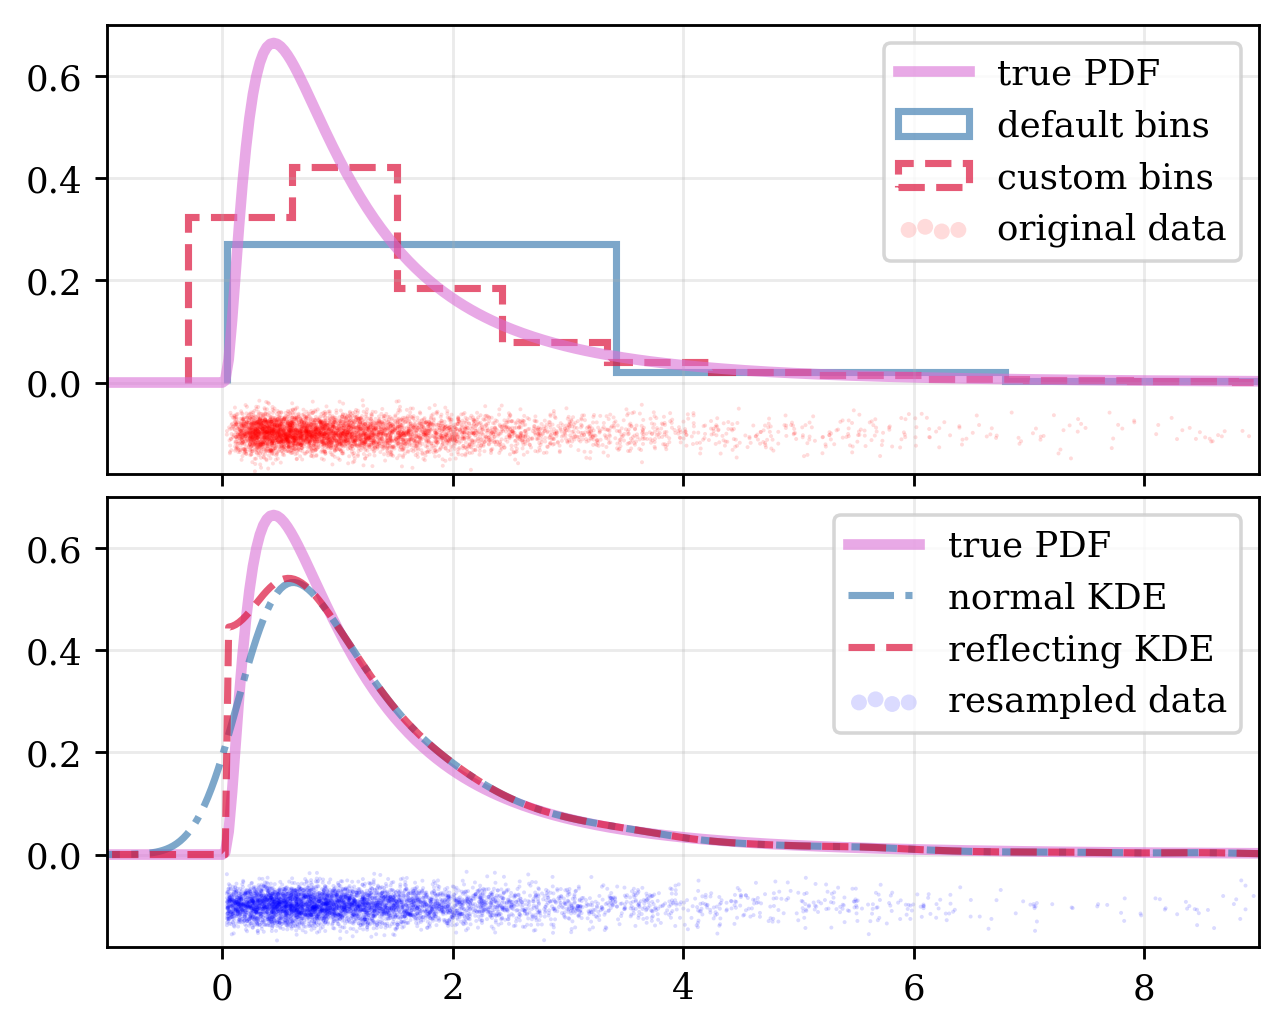

In [31]:

fig, axes = plt.subplots(figsize=[5, 4], dpi=DPI, nrows=2)
plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.98, hspace=0.05)
    
NUM = 5000

np.random.seed(5142)
sigma = 0.9
aa = np.random.lognormal(sigma=sigma, size=NUM)

extr = [0.0, 10.0]
edges = kale.utils.spacing(extr, 'lin', 12) - 0.3
grid = kale.utils.spacing(extr, 'lin', 500, stretch=0.5)

vals = [-1e-6, 0.0, 1e6]
grid = np.insert(grid, np.searchsorted(grid, vals), vals)
pdf = sp.stats.lognorm(sigma).pdf(grid)

for ii, ax in enumerate(axes):
#     label = 'original data' if ii == 0 else None
#     kale.plot.carpet(aa, ax=ax, label=label, shift=0.04)
    ax.plot(grid, pdf, ls='-', color='orchid', label='true PDF', alpha=0.6, lw=3.0)    

kale.plot.carpet(aa, ax=axes[0], yave=-0.1, ystd=0.02, label='original data')  # , shift=0.04)

kw = dict(histtype='step', lw=2.0, alpha=0.7, density=True)  # edgecolor='k', 

ax = axes[0]
ax.set_xticklabels([])
names = ['default bins', 'custom bins']
colors = ['steelblue', 'crimson']
lines = ['-', '--']
for ii, edg in enumerate([None, edges]):
    cc = colors[ii]
    ax.hist(aa, bins=edg, color=cc, ls=lines[ii], label=names[ii], **kw)

# ax.legend()
ax.legend(scatterpoints=4, markerscale=4.0)




ax = axes[1]
boundaries = [None, [True, None]]
names = ['normal KDE', 'reflecting KDE']
lines = ['-.', '--']
colors = ['steelblue', 'crimson']
for ii, (bnd, cc, ls) in enumerate(zip(boundaries, colors, lines)):
    kde = kale.KDE(aa, reflect=bnd)
    _, pdf = kde.density(grid, probability=True)
    ax.plot(grid, pdf, color=cc, ls=ls, lw=2.0, alpha=0.7, label=names[ii])
    
for ax in axes:
    ax.set(xlim=[-1, 9], ylim=[-0.18, 0.7])  # , ylim=[-0.18, 0.72])
    ax.grid(alpha=0.25)
    ax.set_yticks(np.arange(0.0, 0.8, 0.2))
    
bb = kde.resample()
kale.plot.carpet(bb, color='b', yave=-0.1, ystd=0.02, ax=ax, label='resampled data') # , shift=-0.08)
    
# plt.legend()
ax.legend(scatterpoints=4, markerscale=4.0)

fname = 'fig_one.png'
fname = os.path.abspath(fname)
plt.savefig(fname, dpi=DPI, rasterize=True)  # , transparent=True)
print("Saved to '{}'".format(fname))

nbshow()
